In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
diamonds = pd.read_csv('C:/Users/neha1/Desktop/Innomatics/KNN/diamonds.csv')

In [63]:
diamonds.shape

(53940, 10)

In [64]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [65]:
diamonds.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [66]:
diamonds.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [67]:
diamonds2 = diamonds.iloc[:,[0,1,2,3,4,5,7,8,9,6]]

In [68]:
diamonds2.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


In [69]:
diamonds2.shape

(53940, 10)

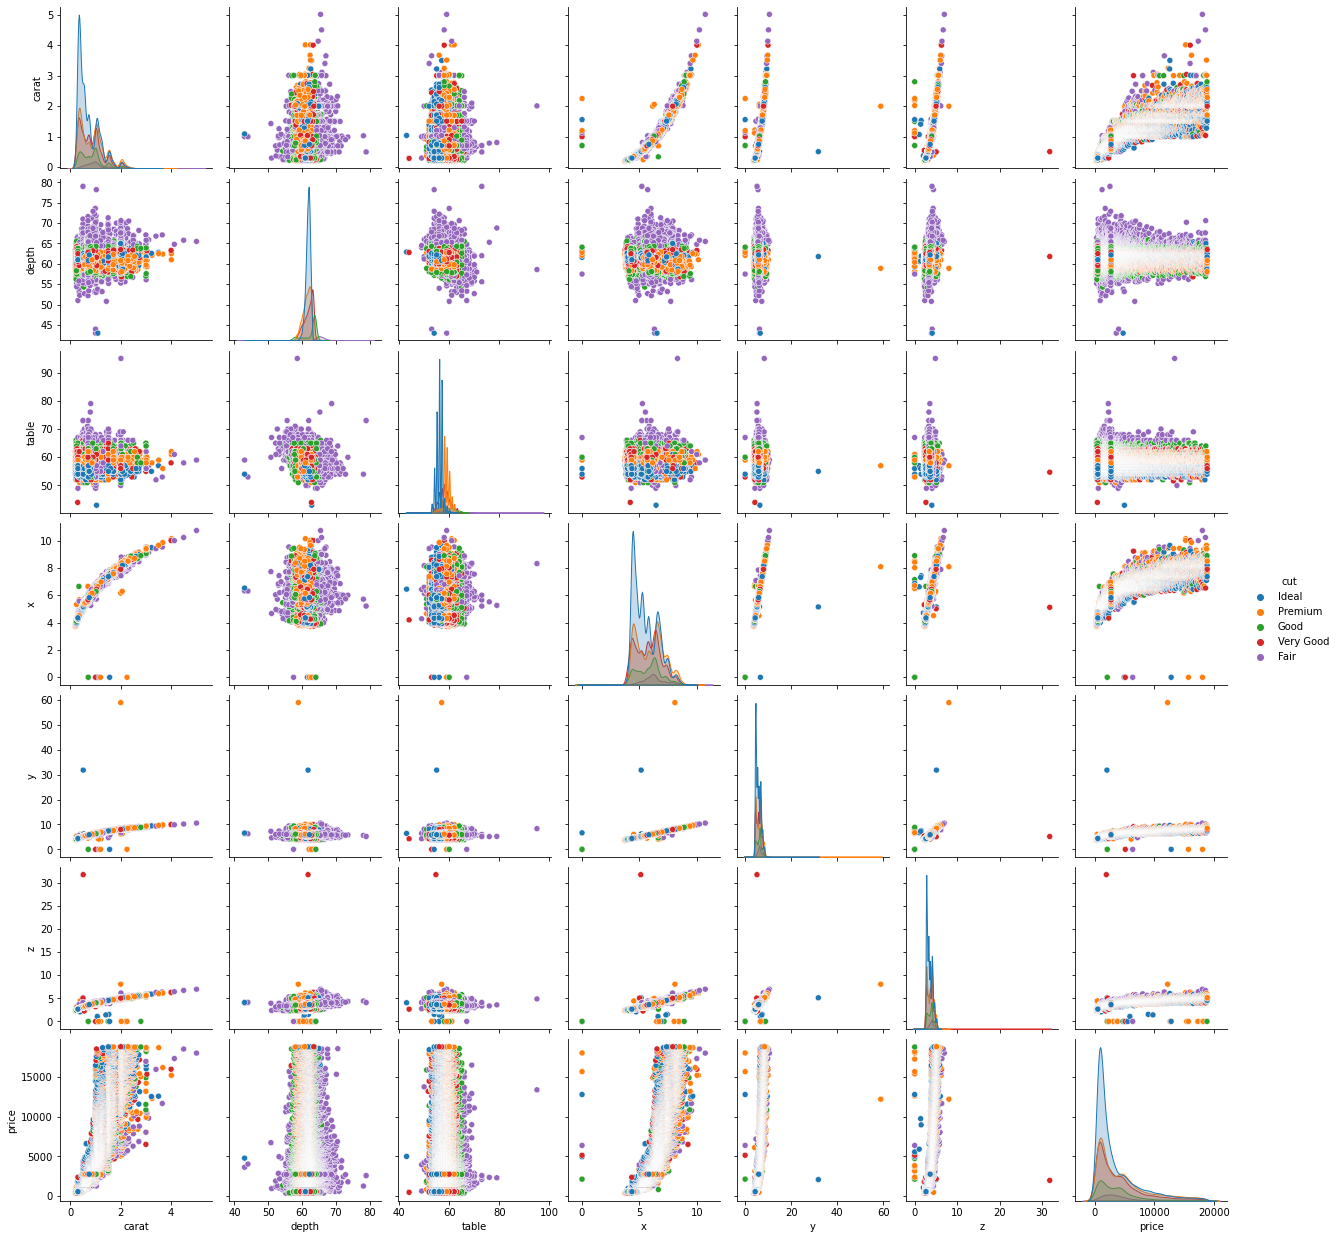

In [90]:
sns.pairplot(diamonds2, hue='cut')

In [95]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
cut_types = ('Ideal','Premium','Good','Very Good','Fair')
cut_df = pd.DataFrame(cut_types, columns=['Cut_Types'])# creating instance of labelencoder
labelencoder = LabelEncoder()# Assigning numerical values and storing in another column
cut_df['Cut_Types_Cat'] = labelencoder.fit_transform(cut_df['Cut_Types'])
cut_df

,Cut_Types,Cut_Types_Cat
0,Ideal,2
1,Premium,3
2,Good,1
3,Very Good,4
4,Fair,0


In [99]:
target = diamonds2.cut_types
data = diamonds2.loc[:,['carat', 'price']]

AttributeError: 'DataFrame' object has no attribute 'cut_types'

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
X = diamonds2.iloc[:,:9]

In [102]:
y = diamonds2['price']

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
X_train.shape ,X_test.shape, y_train.shape, y_test.shape

((40455, 9), (13485, 9), (40455,), (13485,))

In [104]:
#Handling Categorical Data

X_train_cat = X_train.select_dtypes(include=['object'])
X_train_cat.head()
color_encoder = {'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7}
X_train_cat['color'] = X_train_cat['color'].apply(lambda x : color_encoder[x])

C:\Users\neha1\AppData\Local\Temp/ipykernel_7656/495086159.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_cat['color'] = X_train_cat['color'].apply(lambda x : color_encoder[x])


In [105]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X_train_cat['cut']=le.fit_transform(X_train_cat['cut'])
X_train_cat['clarity']=le.fit_transform(X_train_cat['clarity'])

C:\Users\neha1\AppData\Local\Temp/ipykernel_7656/1608606675.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_cat['cut']=le.fit_transform(X_train_cat['cut'])
C:\Users\neha1\AppData\Local\Temp/ipykernel_7656/1608606675.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_cat['clarity']=le.fit_transform(X_train_cat['clarity'])


In [106]:
# Handling Numerical Data
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])
X_train_num.head()

,carat,depth,table,x,y,z
35490,0.43,61.5,56.0,4.85,4.89,2.99
18600,1.12,62.8,57.0,6.61,6.64,4.16
6563,1.01,56.9,60.0,6.68,6.64,3.79
163,0.71,61.9,57.0,5.73,5.77,3.56
34422,0.30,62.1,55.0,4.32,4.35,2.69


In [108]:
X_train_cn = pd.concat([X_train_cat,X_train_num], axis=1)
X_train_cn.head()

,cut,color,clarity,carat,depth,table,x,y,z
35490,2,5,5,0.43,61.5,56.0,4.85,4.89,2.99
18600,4,6,5,1.12,62.8,57.0,6.61,6.64,4.16
6563,1,5,3,1.01,56.9,60.0,6.68,6.64,3.79
163,2,4,5,0.71,61.9,57.0,5.73,5.77,3.56
34422,2,4,1,0.30,62.1,55.0,4.32,4.35,2.69


In [109]:
# Standardizing The Data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_new = pd.DataFrame(scaler.fit_transform(X_train_cn),columns = X_train_cn.columns,index = X_train_cn.index)

X_train_new.head()

,cut,color,clarity,carat,depth,table,x,y,z
35490,-0.536366,0.347318,0.679657,-0.776207,-0.173626,-0.654796,-0.786221,-0.734665,-0.775204
18600,1.405872,0.936053,0.679657,0.679477,0.729572,-0.207952,0.783843,0.786473,0.875922
6563,-1.507485,0.347318,-0.479978,0.447411,-3.369554,1.132581,0.846288,0.786473,0.353771
163,-0.536366,-0.241417,0.679657,-0.185494,0.104281,-0.207952,-0.001189,0.030250,0.029191
34422,-0.536366,-0.241417,-1.639612,-1.050466,0.243235,-1.101640,-1.259025,-1.204044,-1.198569


In [111]:
# Test Data Preprocessing
X_test_cat = X_test.select_dtypes(include=['object'])
X_test_cat.head()

,cut,color,clarity
2569,Premium,F,VS1
17740,Very Good,I,IF
542,Premium,H,SI2
16743,Premium,H,VS2
2385,Good,H,SI2


In [112]:
color_encoder = {'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7}

X_test_cat['color'] = X_test_cat['color'].apply(lambda x : color_encoder[x])

C:\Users\neha1\AppData\Local\Temp/ipykernel_7656/2129451084.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_cat['color'] = X_test_cat['color'].apply(lambda x : color_encoder[x])


In [113]:
# Label Encoding
X_test_cat['cut']=le.fit_transform(X_test_cat['cut'])
X_test_cat['clarity']=le.fit_transform(X_test_cat['clarity'])

C:\Users\neha1\AppData\Local\Temp/ipykernel_7656/3364318706.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_cat['cut']=le.fit_transform(X_test_cat['cut'])
C:\Users\neha1\AppData\Local\Temp/ipykernel_7656/3364318706.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_cat['clarity']=le.fit_transform(X_test_cat['clarity'])


In [114]:
X_test_cat.head()

,cut,color,clarity
2569,3,5,4
17740,4,2,1
542,3,3,3
16743,3,3,5
2385,1,3,3


In [115]:
# Handling numerical columns in test
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])
X_test_num.head()

,carat,depth,table,x,y,z
2569,0.73,60.7,61.0,5.79,5.75,3.50
17740,1.20,59.1,61.0,6.91,6.99,4.11
542,1.01,61.6,61.0,6.39,6.31,3.91
16743,1.20,60.6,58.0,6.88,6.82,4.15
2385,0.40,63.8,57.0,4.67,4.70,2.99


In [116]:
X_test_cn = pd.concat([X_test_cat,X_test_num], axis=1)
X_test_cn.head()

,cut,color,clarity,carat,depth,table,x,y,z
2569,3,5,4,0.73,60.7,61.0,5.79,5.75,3.50
17740,4,2,1,1.20,59.1,61.0,6.91,6.99,4.11
542,3,3,3,1.01,61.6,61.0,6.39,6.31,3.91
16743,3,3,5,1.20,60.6,58.0,6.88,6.82,4.15
2385,1,3,3,0.40,63.8,57.0,4.67,4.70,2.99


In [117]:
# Standardizing the data
X_test_new = pd.DataFrame(scaler.transform(X_test_cn),columns = X_test_cn.columns,index = X_test_cn.index)

X_test_new.head()

,cut,color,clarity,carat,depth,table,x,y,z
2569,0.434753,0.347318,0.099839,-0.143301,-0.729439,1.579425,0.052335,0.012866,-0.055482
17740,1.405872,-1.418887,-1.639612,0.848252,-1.841067,1.579425,1.051467,1.090700,0.805361
542,0.434753,-0.830152,-0.479978,0.447411,-0.104149,1.579425,0.587585,0.499630,0.523117
16743,0.434753,-0.830152,0.679657,0.848252,-0.798916,0.238892,1.024705,0.942932,0.861810
2385,-1.507485,-0.830152,-0.479978,-0.839497,1.424339,-0.207952,-0.946796,-0.899817,-0.775204


In [118]:
class KNN_Regression:
    def __init__(self,k):
        self.k=k
        
    def fit_func(self,X,y):
        self.X=np.asarray(X)
        self.y=np.asarray(y)
        
    def predict_func(self,X):
        X=np.asarray(X)
        predict=[]
        for x in X:
            distance=np.sqrt(np.sum((x-self.X)**2,axis=1))
            sort_value=distance.argsort()
            sort_value=sort_value[:self.k]
            predict.append(np.mean(self.y[sort_value]))
        return np.array(predict)

In [127]:
Model=KNN_Regression(k=3)
Model.fit_func(X_train_new,y_train)
y_pred_KNN=Model.predict_func(X_test_new)

In [128]:
y_pred_KNN

array([2848.33333333, 5465.33333333, 3790.33333333, ..., 2600.66666667,
        892.        , 1208.66666667])

In [129]:
from sklearn import metrics
scratch_acu=metrics.r2_score(y_test,y_pred_KNN)
scratch_acu

0.9576556895101995

In [130]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred_KNN))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred_KNN))


print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_KNN)))

Mean Absolute Error:  418.79335063650973
Mean Squared Error:  677706.046594982
Root Mean Squared Error:  823.2290365353873


In [136]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train_new,y_train)

RandomForestRegressor()

In [137]:
RandomForestRegressor()

RandomForestRegressor()

In [138]:
y_test_pred = regressor.predict(X_test_new)

In [141]:
temp_df = pd.DataFrame({'Actual':y_test, 'Predicted':y_test_pred})
temp_df.head()

,Actual,Predicted
2569,3211,2846.75
17740,7141,7014.56
542,2828,3819.71
16743,6666,6485.74
2385,561,615.82


In [144]:
#Saving serialization

from pickle import dump
dump (scaler, open('models/standard_scaler.pkl','wb'))

FileNotFoundError: [Errno 2] No such file or directory: 'models/standard_scaler.pkl'